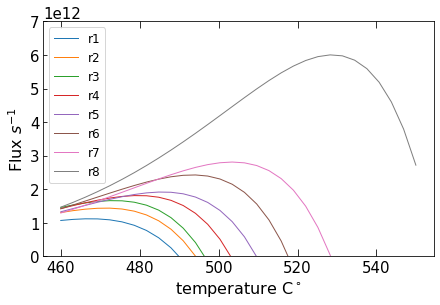

In [76]:
#********************************************************************
# Note: everything is converted to SI units unless printed otherwise
# takes into account the clamp
# looks at the flux vs temperature for each tube size
# plot is made yet it is super annoying to change parameters
#********************************************************************

#Global Constants
kB = 1.38064852*10**(-23) # m^2 kg s^-2 K^-1 (boltzmann constant)
M  = 171*1.66054e-27      # mass of Yb in kg
sigma    = 1.5*10**(-19)  # cross sectional area of an atom

#Libraries
import matplotlib.pyplot as plt #plotting
import numpy as np
import matplotlib.pylab as pylab #plotting
import scipy.integrate as integrate #integrating
from numpy import sqrt, sin, cos, pi
from decimal import Decimal

#formatting plots
pylab.rcParams['figure.figsize'] = 7,7/1.62
pylab.rcParams['figure.autolayout'] = False
pylab.rcParams.update({'axes.labelsize': 20})
pylab.rcParams.update({'xtick.labelsize': 15})
pylab.rcParams.update({'ytick.labelsize': 15})
pylab.rcParams.update({'lines.linewidth': 1.0})
pylab.rcParams.update({'axes.titlesize': 20.0})

pylab.rcParams.update({'ytick.direction': 'in'}) 
pylab.rcParams.update({'xtick.major.size': 7})   
pylab.rcParams.update({'xtick.direction': 'in'}) 
pylab.rcParams.update({'xtick.top': True}) 
pylab.rcParams.update({'xtick.minor.bottom': True}) 

plt.ylabel('Flux $s^{-1}$',fontsize=16)
plt.xlabel('temperature C$^\circ$', fontsize=16)

#Set Parameters
T_oven       = np.linspace(460, 550, 30)      
len_algn_fud = 3          # length of the triangle alignment fudge factor
h_clamp      = 2*10**(-3) # height of the clamp

#Dimensional Parameters (m)
R_DPT      = 2.5*10**(-3) # radius of DPT
L_DPT      = 518*10**(-3) # length from the end of nozzle to the end of DPT   
trngle_len = 2*np.sqrt(3)*R_DPT

# outer diameter radius and inner array parameters picked from the sheet
# These were picked based on the high ratios between the inner diameter and outer diameter
rOD   = np.array([0.0425,0.0355,0.032,0.028,0.025,0.020,0.0163,0.008])*(0.0254/2) #conversion to meters and radius
rID   = np.array([0.035 ,0.031 ,0.029,0.024,0.020,0.016,0.0120,0.006])*(0.0254/2) #conversion to meters and radius
gauge = np.array(['19X','20XX','21XX','22XX','23XX','25XX','27X','33X'])          # gauges of corresponding radii

# Convert set temperature in Celcius to Kelvin
T = T_oven + 273


#***********************************************************************
# ONLY TEMPERATURE STUFF

#***********************************************************************

# Quantities which all Depend on temperature: pressure, density, velocity
P        = 10**(5.006 + 9.111 - 8111/T -1.0849*np.log10(T)) # pressure calculation
v_tilde  = np.sqrt(kB*T/M)                                  # convenient redefinition
n_0      = P/(kB*T)                                         # Number of atoms per Volume
v_mp     = np.sqrt(2)*v_tilde                               # most probable velocity
v_avg    = np.sqrt(8/(np.pi))*v_tilde                       # avergae velocity
v_rms    = np.sqrt(3)*v_tilde                               # root-mean-square velocity


#***********************************************************************
# ONLY DIMENSIONAL STUFF

#***********************************************************************


# Calculating Dimensional Parameters
n1             = trngle_len/(2*rOD[0])                          # number of tubes along the side of the triangle
n2             = trngle_len/(2*rOD[1])                          # number of tubes along the side of the triangle
n3             = trngle_len/(2*rOD[2])                          # number of tubes along the side of the triangle
n4             = trngle_len/(2*rOD[3])                          # number of tubes along the side of the triangle
n5             = trngle_len/(2*rOD[4])                          # number of tubes along the side of the triangle
n6             = trngle_len/(2*rOD[5])                          # number of tubes along the side of the triangle
n7             = trngle_len/(2*rOD[6])                          # number of tubes along the side of the triangle
n8             = trngle_len/(2*rOD[7])                          # number of tubes along the side of the triangle

N_tubes1       = n1*(n1+1)/2                                   # number of tubes, triangular numbers formula
N_tubes2       = n2*(n2+1)/2                                   # number of tubes, triangular numbers formula
N_tubes3       = n3*(n3+1)/2                                   # number of tubes, triangular numbers formula
N_tubes4       = n4*(n4+1)/2                                   # number of tubes, triangular numbers formula
N_tubes5       = n5*(n5+1)/2                                   # number of tubes, triangular numbers formula
N_tubes6       = n6*(n6+1)/2                                   # number of tubes, triangular numbers formula
N_tubes7       = n7*(n7+1)/2                                   # number of tubes, triangular numbers formula
N_tubes8       = n8*(n8+1)/2                                   # number of tubes, triangular numbers formula

A_trngle      = (trngle_len**(2)*sqrt(3)/4)                 # area of triangle nozzle without tubes
A_open1        = A_trngle - N_tubes1*pi*(rOD[0]**2 - rID[0]**2)     # m^2, total open area of nozzle 
A_open2        = A_trngle - N_tubes2*pi*(rOD[1]**2 - rID[1]**2)     # m^2, total open area of nozzle 
A_open3        = A_trngle - N_tubes3*pi*(rOD[2]**2 - rID[2]**2)     # m^2, total open area of nozzle 
A_open4        = A_trngle - N_tubes4*pi*(rOD[3]**2 - rID[3]**2)     # m^2, total open area of nozzle 
A_open5        = A_trngle - N_tubes5*pi*(rOD[4]**2 - rID[4]**2)     # m^2, total open area of nozzle 
A_open6        = A_trngle - N_tubes6*pi*(rOD[5]**2 - rID[5]**2)     # m^2, total open area of nozzle 
A_open7        = A_trngle - N_tubes7*pi*(rOD[6]**2 - rID[6]**2)     # m^2, total open area of nozzle 
A_open8        = A_trngle - N_tubes8*pi*(rOD[7]**2 - rID[7]**2)     # m^2, total open area of nozzle 

area_DPT      = pi*R_DPT**(2)                               # area of the DPT  
h_trngle      = trngle_len*np.sqrt(3)/2

L_DPT_fud     = L_DPT/len_algn_fud                          # optimal length of tubes with fudge factor
theta_DPT     = np.arctan(R_DPT/L_DPT)                      # maximum angle of atoms out of the DPT 
theta_DPT_fud = np.arctan(R_DPT/L_DPT_fud)                  # maximum angle with fudged length

L_opt1         = rID[0]/(np.tan(theta_DPT))                     # optimal length of tubes
L_opt_fud1     = L_opt1/len_algn_fud                          # fudged optimal length of tubes

L_opt2         = rID[1]/(np.tan(theta_DPT))                     # optimal length of tubes
L_opt_fud2     = L_opt2/len_algn_fud                          # fudged optimal length of tubes

L_opt3         = rID[2]/(np.tan(theta_DPT))                     # optimal length of tubes
L_opt_fud3     = L_opt3/len_algn_fud                          # fudged optimal length of tubes

L_opt4         = rID[3]/(np.tan(theta_DPT))                     # optimal length of tubes
L_opt_fud4     = L_opt4/len_algn_fud                          # fudged optimal length of tubes

L_opt5         = rID[4]/(np.tan(theta_DPT))                     # optimal length of tubes
L_opt_fud5     = L_opt5/len_algn_fud                          # fudged optimal length of tubes

L_opt6         = rID[5]/(np.tan(theta_DPT))                     # optimal length of tubes
L_opt_fud6     = L_opt6/len_algn_fud                          # fudged optimal length of tubes

L_opt7         = rID[6]/(np.tan(theta_DPT))                     # optimal length of tubes
L_opt_fud7     = L_opt7/len_algn_fud                          # fudged optimal length of tubes

L_opt8         = rID[7]/(np.tan(theta_DPT))                     # optimal length of tubes
L_opt_fud8     = L_opt8/len_algn_fud                          # fudged optimal length of tubes

r_sld_angles_fud = (theta_DPT)**2/(theta_DPT_fud)**2        # Area Ratio of theta_DPT and theta_DPT_fud
area_ratio       = area_DPT/A_trngle                        # Area Ratio

# trapezoidal calculations
clamp_lid_len = trngle_len + 2*h_clamp/(np.sqrt(3))
side_clamp    = np.sqrt(h_clamp**(2)+ h_clamp**(2)/3)



#***********************************************************************
# Right here is where the problems come in if normal array
# these are numpy arrays so its trying to divide each element of the dimensional stuff
# by each element in the temperature stuff and they are not the same size

# the flux calculations combine the dimensional calculations with the temperature
# related calculations

#***********************************************************************


# Flux Calculations
I             = integrate.quad(lambda x: sin(x)*cos(x)/2, 0, theta_DPT) 
Flux1          = A_open1*v_mp*n_0*I[0]  
Flux2          = A_open2*v_mp*n_0*I[0] 
Flux3          = A_open3*v_mp*n_0*I[0] 
Flux4          = A_open4*v_mp*n_0*I[0] 
Flux5          = A_open5*v_mp*n_0*I[0] 
Flux6          = A_open6*v_mp*n_0*I[0] 
Flux7          = A_open7*v_mp*n_0*I[0] 
Flux8          = A_open8*v_mp*n_0*I[0] 

I_fud         = integrate.quad(lambda x: sin(x)*cos(x)/2, 0, theta_DPT_fud)

Flux_fud1      = A_open1*v_mp*n_0*I_fud[0] 
Flux_DPT_fud1  = Flux_fud1*r_sld_angles_fud*area_ratio

Flux_fud2      = A_open2*v_mp*n_0*I_fud[0] 
Flux_DPT_fud2  = Flux_fud2*r_sld_angles_fud*area_ratio

Flux_fud3      = A_open3*v_mp*n_0*I_fud[0] 
Flux_DPT_fud3  = Flux_fud3*r_sld_angles_fud*area_ratio

Flux_fud4      = A_open4*v_mp*n_0*I_fud[0] 
Flux_DPT_fud4  = Flux_fud4*r_sld_angles_fud*area_ratio

Flux_fud5      = A_open5*v_mp*n_0*I_fud[0] 
Flux_DPT_fud5  = Flux_fud5*r_sld_angles_fud*area_ratio

Flux_fud6      = A_open6*v_mp*n_0*I_fud[0] 
Flux_DPT_fud6  = Flux_fud6*r_sld_angles_fud*area_ratio

Flux_fud7      = A_open7*v_mp*n_0*I_fud[0] 
Flux_DPT_fud7  = Flux_fud7*r_sld_angles_fud*area_ratio

Flux_fud8      = A_open8*v_mp*n_0*I_fud[0] 
Flux_DPT_fud8  = Flux_fud8*r_sld_angles_fud*area_ratio

# Estimating the Number of collisons for each size
MFP = 1/(n_0*sigma)


#***********************************************************************
# Right here is where the problems come in if normal array (f)
# these are numpy arrays so its trying to divide each element of the dimensional stuff
# by each element in the temperature stuff and they are not the same size

#***********************************************************************

f1   = L_opt_fud1/MFP
f2   = L_opt_fud2/MFP
f3   = L_opt_fud3/MFP
f4   = L_opt_fud4/MFP
f5   = L_opt_fud5/MFP
f6   = L_opt_fud6/MFP
f7   = L_opt_fud7/MFP
f8   = L_opt_fud8/MFP

# assume that everytime the atoms collide they wont make it through the tube opening 
fraction_Flux1 = Flux_DPT_fud1 - f1*Flux_DPT_fud1 
fraction_Flux2 = Flux_DPT_fud2 - f2*Flux_DPT_fud2 
fraction_Flux3 = Flux_DPT_fud3 - f3*Flux_DPT_fud3 
fraction_Flux4 = Flux_DPT_fud4 - f4*Flux_DPT_fud4
fraction_Flux5 = Flux_DPT_fud5 - f5*Flux_DPT_fud5
fraction_Flux6 = Flux_DPT_fud6 - f6*Flux_DPT_fud6
fraction_Flux7 = Flux_DPT_fud7 - f7*Flux_DPT_fud7
fraction_Flux8 = Flux_DPT_fud8 - f8*Flux_DPT_fud8

plt.plot(T_oven,fraction_Flux1, label='r1')
plt.plot(T_oven,fraction_Flux2, label='r2')
plt.plot(T_oven,fraction_Flux3, label='r3')
plt.plot(T_oven,fraction_Flux4, label='r4')
plt.plot(T_oven,fraction_Flux5, label='r5')
plt.plot(T_oven,fraction_Flux6, label='r6')
plt.plot(T_oven,fraction_Flux7, label='r7')
plt.plot(T_oven,fraction_Flux8, label='r8')

# minimum and maximum values on the plot
plt.ylim(ymin=0,ymax=.7*10**(13)) 

plt.legend(fontsize=12)
pylab.savefig('FluxvsTemp.pdf', format='pdf', dpi=1000,bbox_inches='tight')
